## Program za hiter izris in preverjanje signala

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import lvm_read
from scipy.signal import find_peaks

In [3]:
file = 'marko-sin.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
# N = data[0]
# N1 = np.arange(0, 300)
t = data[0]
t1 = np.arange(0,0.5, 0.01)
kanal_1 = data[1]
kanal_2 = data[2]
len(t)

220

Average peak kanal_1 = 2.461
Average low kanal_1 = 1.502
Average = 1.981
Amplituda = 0.959


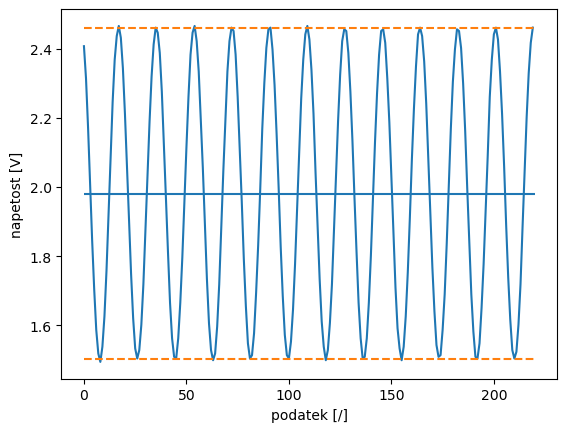

In [15]:
def limiti(kanal):
    '''Vzame podatek o kanalu, ki ga obravnava
    Vrne Povprečno vrednost spodnjih in zgornjih limit'''
    peaks1, _ = find_peaks(kanal, distance=4)
    lows1, _ = find_peaks(-kanal, distance=4)
    A2 = np.average(kanal[peaks1])
    A1 = np.average(kanal[lows1])
    return A1, A2
    
    
A1, A2 = limiti(kanal_1)
plt.plot(kanal_1)
plt.hlines(np.average(kanal_1), 0, len(kanal_1))
plt.hlines(A1, 0, len(kanal_1), colors='C1', linestyles='dashed')
plt.hlines(A2, 0, len(kanal_1), colors='C1', linestyles='dashed')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')

print(f'Average peak kanal_1 = {A2:.3f}')
print(f'Average low kanal_1 = {A1:.3f}')
print(f'Average = {np.average(kanal_1):.3f}')
print(f'Amplituda = {(A2-A1):.3f}')

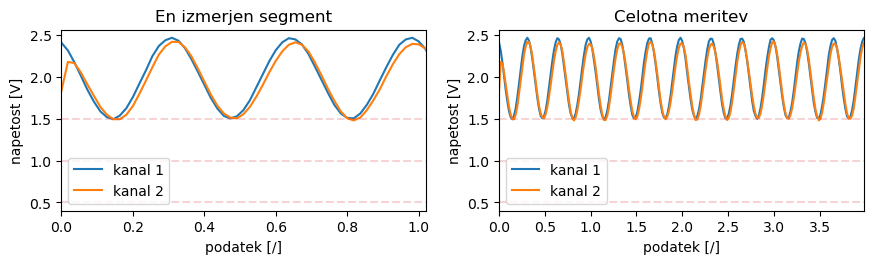

In [5]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(3,3,1)
plt.gca().set_title('En izmerjen segment')
plt.plot(t, kanal_1, label='kanal 1')
plt.plot(t, kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, (t[-1]+0.1)/4)
plt.hlines(1, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.legend()

Tp = len(t)
plt.subplot(3,3,2)
plt.gca().set_title('Celotna meritev')
plt.plot(t, kanal_1, label='kanal 1')
plt.plot(t, kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, t[-1])
plt.hlines(1, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(0.5, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(1.5, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.legend()

plt.show()

Average peak kanal_1 = 2.461
Average low kanal_1 = 1.502
Average = 1.9805574681818185


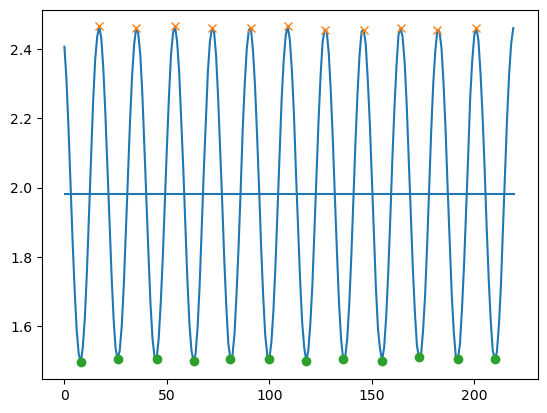

In [34]:
from scipy.signal import find_peaks
M1 = max(kanal_1)
M2 = max(kanal_2)
delta = 0.3
# peaks1, _ = find_peaks(kanal_1, height=[M1 - delta ,M1 + delta])
peaks1, _ = find_peaks(kanal_1, distance=4)
lows1, _ = find_peaks(-kanal_1, distance=4)
plt.plot(kanal_1)
plt.plot(peaks1, kanal_1[peaks1], "x")
plt.plot(lows1, kanal_1[lows1], "o")
plt.hlines(np.average(kanal_1), 0, len(kanal_1))
A2 = np.average(kanal_1[peaks1])
A1 = np.average(kanal_1[lows1])
print(f'Average peak kanal_1 = {A2:.3f}')
print(f'Average low kanal_1 = {A1:.3f}')
print(f'Average = {np.average(kanal_1)}')

0.971679

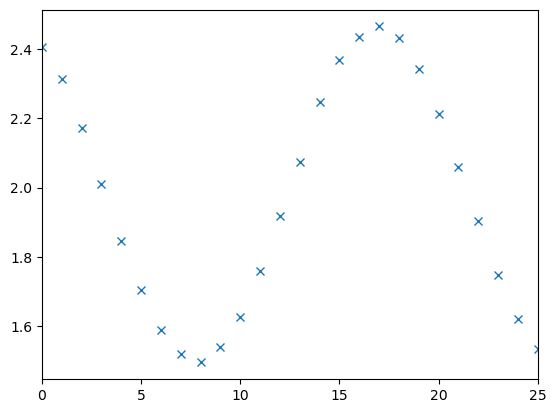

In [31]:
plt.plot(kanal_1, "x")
plt.xlim(0, 25)
max(kanal_1[:25]) - min(kanal_1[:17]) 